## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
 of 400 km.

## a) Filter EVs by Budget and Range

Steps:
-	Load the dataset into a DataFrame.
-   Apply the filtering conditions: budget (Minimal price (gross) [PLN]) should be ≤ 350,000 PLN, and Range (WLTP) [km] should be ≥ 400 km.


In [1]:
import pandas as pd

In [5]:
source=pd.read_excel("FEV.xlsx")
filtered = source[(source['Minimal price (gross) [PLN]'] <= 350000) & (source['Range (WLTP) [km]'] >= 400)]
print("\nFiltered EV with Budget less than 350,000 PLN and Range more than 400KM below : ")
filtered


Filtered EV with Budget less than 350,000 PLN and Range more than 400KM below : 


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


## b) Group them by the manufacturer (Make).

After filtering the dataset, we need to group the EVs by manufacturer (Make) to get an overview of the distribution of vehicles from different manufacturers.

In [11]:
grouped_make=filtered.groupby('Make').size()
print("\nFiltered EV grouped by Manufacturer/Make below : ")
grouped_make


Filtered EV grouped by Manufacturer/Make below : 


Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
dtype: int64

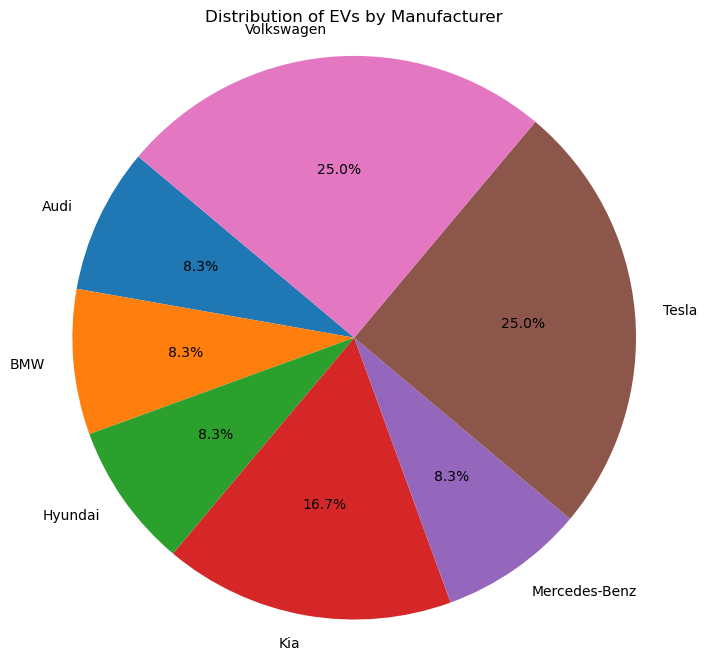

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_make, labels=grouped_make.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of EVs by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Audi leads with the highest average battery capacity:**

Audi's average battery capacity of 95 kWh suggests that its EVs are designed to offer longer driving ranges, catering to customers looking for high-performance electric vehicles.

**BMW and Mercedes-Benz:**

Both BMW and Mercedes-Benz have an average battery capacity of 80 kWh, which indicates these manufacturers prioritize a balance between range and performance. Their EVs are likely to have a good range suitable for most drivers without excessively large batteries that may add unnecessary weight.

**Hyundai and Kia's lower average battery capacity:**

Hyundai and Kia have the lowest average battery capacities at 64 kWh. This may suggest that these brands focus on offering more affordable electric vehicles with a range sufficient for urban driving, where shorter distances are typical.

**Tesla's battery capacity:**

Tesla's average battery capacity of 68 kWh is relatively moderate, reflecting their focus on a range of EVs that combine performance, affordability, and long driving ranges. Tesla has various models, so the range of battery capacities likely varies, but this average suggests a more balanced offering.

**Volkswagen's battery capacity:**

Volkswagen's average battery capacity of 70.67 kWh indicates a middle-ground strategy, likely offering vehicles with an adequate range and competitive pricing, fitting in between the high-end offerings of Audi and BMW and the more affordable models like Hyundai and Kia.

## c) Calculate the Average Battery Capacity for Each Manufacturer

Now we will again use group by along with mean to calculate the average battery capacity and grouped by manufacturer.

In [12]:
average_battery = filtered.groupby('Make')['Battery capacity [kWh]'].mean()
print("\nThe average battery capacity is : ")
average_battery


The average battery capacity is : 


Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

## Task 2: Finding Outliers in Energy Consumption

We will detect outliers in the Mean Energy Consumption [kWh/100 km] column. Outliers can be detected using methods such as Z-score or Interquartile Range (IQR).

## Steps:

•	Calculate the Z-scores or IQR for the energy consumption column.
•	- Identify values that fall outside of the acceptable range (outliers).


In [13]:
import numpy as np

In [27]:
# Calculating the IQR for energy consumption
Q1 = source['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = source['mean - Energy consumption [kWh/100 km]'].quantile(0.75)

# IQR is nothing but difference between third quantile and 1st quantilea
IQR=Q3-Q1
print(f"IQR value is : {IQR}")

IQR value is : 7.9


In [30]:
outliers = source[(source[['mean - Energy consumption [kWh/100 km]']] < (Q1 - 1.5 * IQR)) |
              (source[['mean - Energy consumption [kWh/100 km]']] > (Q3 + 1.5 * IQR))]
print("\nOutliers are :- ")
outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']]



Outliers are :- 


,Car full name,mean - Energy consumption [kWh/100 km]
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


## outliers
Outliers are those who are significantly different from other data points.
Outliers are typically defined as any data point that falls 
below 
Q1−1.5×IQR 
or 
above 
Q3+1.5×IQR. 
These thresholds help us identify values that are too extreme compared to the rest of the data.
**No Outliers Detected:**
   - The output shows that there are *0 rows* of outliers, meaning no energy consumption values fall outside the expected range defined by the IQR. This could indicate that the dataset is relatively clean and consistent, with energy consumption values falling within a reasonable range for most of the vehicles in the dataset.

**Key Insights:**
 Energy Consumption Consistency: Since no outliers were detected in the dataset, we can infer that the energy consumption values for the vehicles are within a relatively narrow range. This could suggest that most vehicles have similar energy efficiency, which could be attributed to common technology, vehicle type, or battery size.

## Task 3: 
Your manager wants to know if there's a strong relationship between battery
 capacity and range.

## a) Create a suitable plot to visualize.

We will create a scatter plot to visualize the relationship between battery capacity and range. The reason this plot is best as we are checking relationship between 2 variables.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

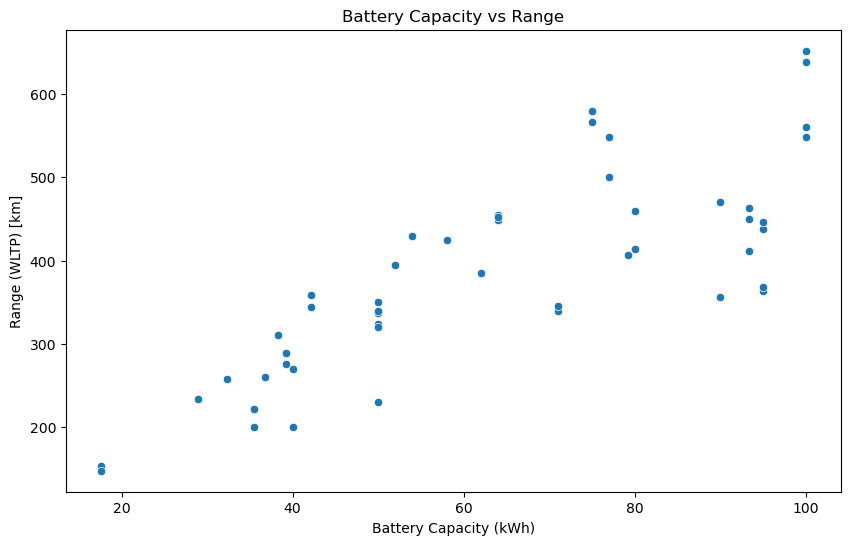

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery capacity [kWh]', y='Range (WLTP) [km]', data=source)
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) [km]')
plt.show()


##  b) Highlight any insights.

After visualizing the plot, we found out that there's a positive correlation between battery capacity and range, meaning that vehicles with larger batteries tend to have a greater range. While the battery with capacity less than 20 kWh have very less range. Battery close to 100kWh have more than 500 Km range.

##  Task 4: Build an EV recommendation class. 
The class should allow users to input their
 budget, desired range, and battery capacity. The class should then return the top three EVs
 matching their criteria. 

We will build an EVRecommendation class that allows users to input their desired budget, range, and battery capacity and get the top 3 EVs that match the criteria.

In [37]:
class EVRecommendation:
    def __init__(self, source):
        self.source = source
    
    def recommend(self, budget, min_range, min_battery_capacity):
        recommendations = self.source[
            (self.source['Minimal price (gross) [PLN]'] <= budget) & 
            (self.source['Range (WLTP) [km]'] >= min_range) & 
            (self.source['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        # Return the top 3 recommendations based on the highest range
        return recommendations.nlargest(3, 'Range (WLTP) [km]')

# Get user input for budget, range, and battery capacity
budget = int(input("Enter your budget in PLN: "))
min_range = int(input("Enter the desired range (in km): "))
min_battery_capacity = int(input("Enter the minimum battery capacity (in kWh): "))

# Create an instance of the EVRecommendation class
ev_rec = EVRecommendation(source)

# Get the top 3 recommendations
top_recommendations = ev_rec.recommend(budget, min_range, min_battery_capacity)

# Display the results
print("\nTop 3 Recommended EVs:")
print(top_recommendations[['Car full name', 'Make', 'Model', 'Battery capacity [kWh]', 'Range (WLTP) [km]']])


Enter your budget in PLN:  200000
Enter the desired range (in km):  250
Enter the minimum battery capacity (in kWh):  35



Top 3 Recommended EVs:
            Car full name        Make         Model  Battery capacity [kWh]  \
48  Volkswagen ID.3 Pro S  Volkswagen    ID.3 Pro S                    77.0   
18       Kia e-Niro 64kWh         Kia  e-Niro 64kWh                    64.0   
20       Kia e-Soul 64kWh         Kia  e-Soul 64kWh                    64.0   

    Range (WLTP) [km]  
48                549  
18                455  
20                452  


## Task 5: Inferential Statistics– Hypothesis Testing: 
Test whether there is a significant
 difference in the average Engine power [KM] of vehicles manufactured by two leading
 manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
 Recommendations and Conclusion: Provide actionable insights based on your analysis.
 (Conduct a two sample t-test using ttest_ind from scipy.stats module)

We will perform a two-sample t-test to test whether there is a significant difference in the average engine power between Tesla and Audi.

## Interpretation:
•	If p-value < 0.05, we reject the null hypothesis (there is a significant difference).
•	If p-value > 0.05, we fail to reject the null hypothesis (no significant difference).


In [39]:
from scipy.stats import ttest_ind

# Filter the dataset for Tesla and Audi
tesla = source[source['Make'] == 'Tesla']['Engine power [KM]']
audi = source[source['Make'] == 'Audi']['Engine power [KM]']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(tesla, audi)

# Display the result
t_stat, p_value


(1.7024444538261416, 0.11672692675082785)

## p-value > 0.05, we fail to reject the null hypothesis (no significant difference).